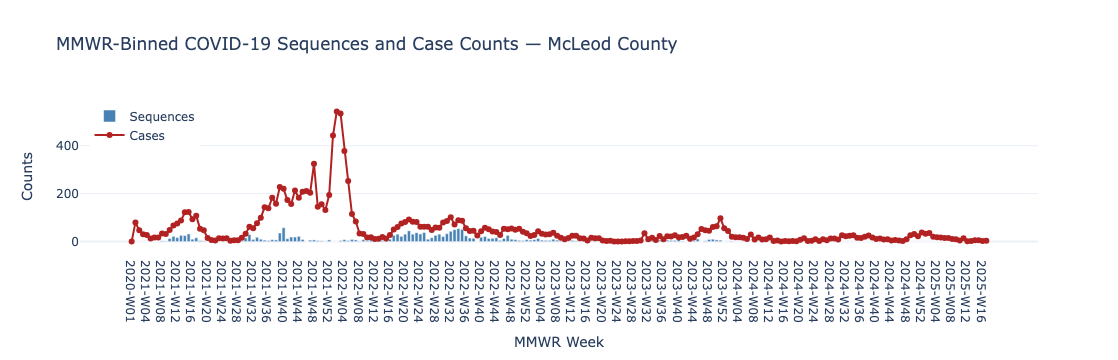

In [10]:
import pandas as pd
import plotly.graph_objects as go

# --- Load merged MMWR-binned data ---
df = pd.read_csv("mmwr_binned_cases_vs_sequences.csv")

# Optional: sort to make sure the timeline is correct
df["sort_date"] = pd.to_datetime(df["mmwr_week"] + "-1", format="%Y-W%W-%w", errors="coerce")
df = df.sort_values("sort_date")

# Prepare labels for interactivity
x_labels = df["mmwr_week"].tolist()

# --- Create interactive figure ---
fig = go.Figure()

# Sequences as bars
fig.add_trace(go.Bar(
    x=x_labels,
    y=df["sequence_count"],
    name="Sequences",
    marker_color="steelblue"
))

# Cases as line
fig.add_trace(go.Scatter(
    x=x_labels,
    y=df["case_count"],
    name="Cases",
    mode="lines+markers",
    marker=dict(color="firebrick"),
    line=dict(color="firebrick")
))

# Layout and formatting
fig.update_layout(
    title="MMWR-Binned COVID-19 Sequences and Case Counts — McLeod County",
    xaxis_title="MMWR Week",
    yaxis_title="Counts",
    hovermode="x unified",
    template="plotly_white",
    barmode="overlay",
    legend=dict(x=0.01, y=0.99)
)

# Display in notebook
fig.show()

# Optionally, save to HTML
fig.write_html("mmwr_interactive_sequence_case_plot.html")

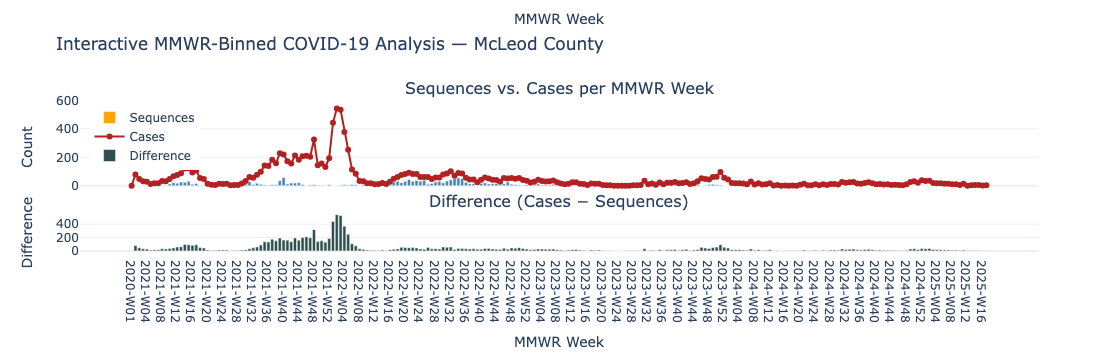

In [11]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Load merged MMWR-binned data ---
df = pd.read_csv("mmwr_binned_cases_vs_sequences.csv")

# Parse mmwr_week to datetime for sorting
df["sort_date"] = pd.to_datetime(df["mmwr_week"] + "-1", format="%Y-W%W-%w", errors="coerce")
df = df.sort_values("sort_date")

# Prepare labels for x-axis
x_labels = df["mmwr_week"].tolist()

# --- Custom Hover Text ---
hover_text = [
    f"Week: {week}<br>Cases: {cases}<br>Sequences: {seq}<br>Difference: {diff}"
    for week, cases, seq, diff in zip(df["mmwr_week"], df["case_count"], df["sequence_count"], df["difference"])
]

# --- Bar Color by Discrepancy ---
bar_colors = ["orange" if diff < 0 else "steelblue" for diff in df["difference"]]

# --- Create Dual Subplots ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.12,
    row_heights=[0.7, 0.3],
    subplot_titles=("Sequences vs. Cases per MMWR Week", "Difference (Cases − Sequences)")
)

# --- Top plot: Sequences as colored bars ---
fig.add_trace(go.Bar(
    x=x_labels,
    y=df["sequence_count"],
    name="Sequences",
    marker_color=bar_colors,
    hovertext=hover_text,
    hoverinfo="text"
), row=1, col=1)

# --- Top plot: Cases as red line ---
fig.add_trace(go.Scatter(
    x=x_labels,
    y=df["case_count"],
    name="Cases",
    mode="lines+markers",
    marker=dict(color="firebrick"),
    line=dict(color="firebrick"),
    hovertext=hover_text,
    hoverinfo="text"
), row=1, col=1)

# --- Bottom plot: Difference bar chart ---
fig.add_trace(go.Bar(
    x=x_labels,
    y=df["difference"],
    name="Difference",
    marker_color="darkslategray",
    hovertext=hover_text,
    hoverinfo="text"
), row=2, col=1)

# --- Layout customization ---
fig.update_layout(
    title="Interactive MMWR-Binned COVID-19 Analysis — McLeod County",
    xaxis_title="MMWR Week",
    yaxis_title="Count",
    xaxis2_title="MMWR Week",
    yaxis2_title="Difference",
    template="plotly_white",
    hovermode="x unified",
    height=700,
    showlegend=True,
    legend=dict(x=0.01, y=0.98)
)

# Display in notebook
fig.show()

# Save to interactive HTML
fig.write_html("mmwr_dashboard_interactive.html")